In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('delayByAirlineFullName.csv', names=['airline', 'to_split'])
df

,airline,to_split
0,American Airlines Inc.,"[8.773519802089302,3.3893364041080796]"
1,Alaska Airlines Inc.,"[1.7794761217474975,-0.9704383814144365]"
2,JetBlue Airways,"[11.333044995656211,6.552679668074653]"
3,Delta Air Lines Inc.,"[7.338090448359994,0.185558312145143]"
4,Atlantic Southeast Airlines,"[8.49219111957299,6.3870610181877945]"
5,Frontier Airlines Inc.,"[13.27060856928971,12.402010216213835]"
6,Hawaiian Airlines Inc.,"[0.48473882945248586,2.0169655968114117]"
7,American Eagle Airlines Inc.,"[9.63204268375465,6.110663471720655]"
8,Spirit Air Lines,"[15.68327383944317,14.202284906158683]"
9,Skywest Airlines Inc.,"[7.67823058605973,5.731005025894318]"


In [3]:
df.to_split.str[1:-1].str.split(',').apply(pd.Series)

,0,1
0,8.773519802089302,3.3893364041080796
1,1.7794761217474975,-0.9704383814144365
2,11.333044995656211,6.552679668074653
3,7.338090448359994,0.185558312145143
4,8.49219111957299,6.3870610181877945
5,13.27060856928971,12.402010216213835
6,0.48473882945248586,2.0169655968114117
7,9.63204268375465,6.110663471720655
8,15.68327383944317,14.202284906158683
9,7.67823058605973,5.731005025894318


In [4]:
df[['dep_delay', 'arr_delay']] = df.to_split.str[1:-1].str.split(',').apply(pd.Series)
df = df.drop(columns='to_split')
df

,airline,dep_delay,arr_delay
0,American Airlines Inc.,8.773519802089302,3.3893364041080796
1,Alaska Airlines Inc.,1.7794761217474975,-0.9704383814144365
2,JetBlue Airways,11.333044995656211,6.552679668074653
3,Delta Air Lines Inc.,7.338090448359994,0.185558312145143
4,Atlantic Southeast Airlines,8.49219111957299,6.3870610181877945
5,Frontier Airlines Inc.,13.27060856928971,12.402010216213835
6,Hawaiian Airlines Inc.,0.48473882945248586,2.0169655968114117
7,American Eagle Airlines Inc.,9.63204268375465,6.110663471720655
8,Spirit Air Lines,15.68327383944317,14.202284906158683
9,Skywest Airlines Inc.,7.67823058605973,5.731005025894318


In [10]:
df['dep_delay'] = df['dep_delay'].astype(float)
df['arr_delay'] = df['arr_delay'].astype(float)

In [13]:
df

,airline,dep_delay,arr_delay
0,American Airlines Inc.,8.773520,3.389336
1,Alaska Airlines Inc.,1.779476,-0.970438
2,JetBlue Airways,11.333045,6.552680
3,Delta Air Lines Inc.,7.338090,0.185558
4,Atlantic Southeast Airlines,8.492191,6.387061
5,Frontier Airlines Inc.,13.270609,12.402010
6,Hawaiian Airlines Inc.,0.484739,2.016966
7,American Eagle Airlines Inc.,9.632043,6.110663
8,Spirit Air Lines,15.683274,14.202285
9,Skywest Airlines Inc.,7.678231,5.731005


In [14]:
import plotly.express as px

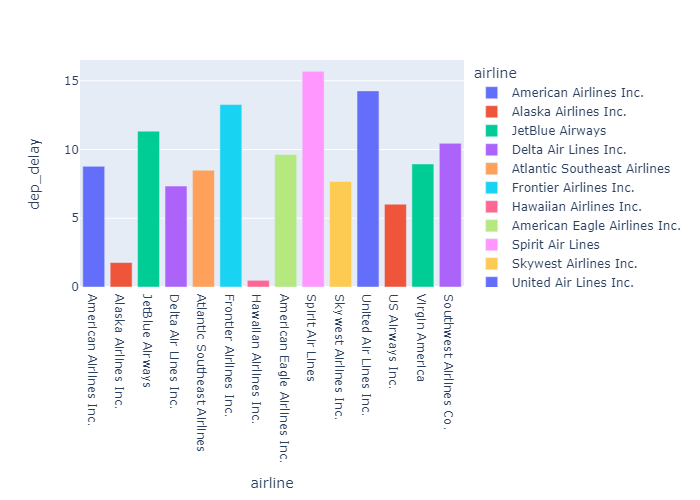

In [15]:
fig = px.bar(df, x='airline', y='dep_delay', color='airline')
fig.show("png")

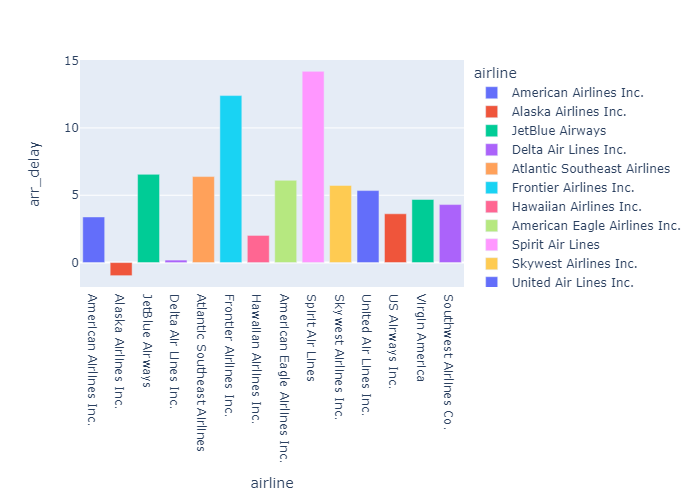

In [16]:
fig = px.bar(df, x='airline', y='arr_delay', color='airline')
fig.show("png")

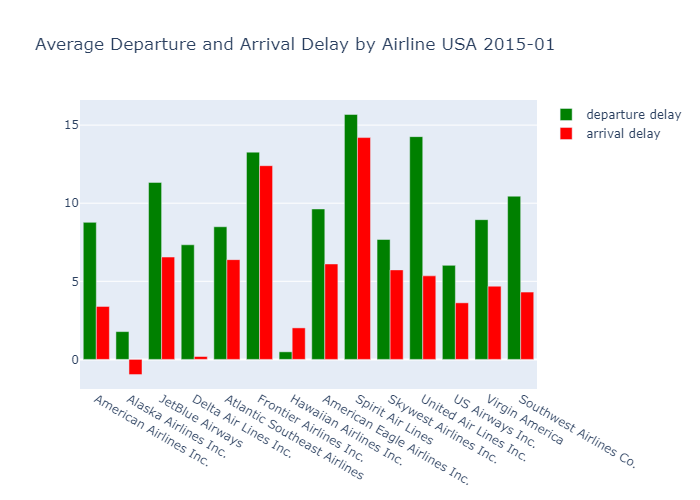

In [21]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x=df.airline, y=df.dep_delay, name='departure delay', marker_color='green'),
                     go.Bar(x=df.airline, y=df.arr_delay, name='arrival delay', marker_color='red')],
               layout=go.Layout(title='Average Departure and Arrival Delay by Airline USA 2015-01'))
fig.show("png")